Spam detection is an important problem that affects many people on a daily basis. It involves identifying and filtering out unwanted or malicious messages, such as unsolicited commercial emails or text messages. In this project, we will develop an end-to-end system for detecting spam messages in SMS and email. This system will use machine learning algorithms to automatically identify and classify spam messages, allowing users to protect themselves from unwanted or malicious content.

#**Step 0: Import Modules/Libraries**

In [161]:
!pip install scikit-learn

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Step 1: Importing Dataset**

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


This particular DataFrame has 5572 rows and 5 columns, as indicated by the RangeIndex and DataColumns attributes. 

The data type of each column is object, which indicates that each value in the column can be any type of data. 

This particular DataFrame has 5572 rows and 5 columns, as indicated by the RangeIndex and DataColumns attributes. 

The data type of each column is object, which indicates that each value in the column can be any type of data.

We will drop thee `Unnamed columns` using the **drop()** function.

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1, inplace=True)

**inplace=True** parameter will modify the original DataFrame, thus creating a new one.

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'message_type', 'v2':'message'}, inplace=True)

In [ ]:
df.head()

,message_type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Due to this being a Machine Learning problem, changing the categorical values to numerical using **LabelEncoder**

In [ ]:
# create an instance of the LabelEncoder
labelencoder = LabelEncoder()

# fit the labelencoder to the categorical data and transform it to numerical values
df['message_type'] = labelencoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

3573    0
1253    0
785     0
2526    0
532     0
Name: message_type, dtype: int64

In [ ]:
df

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
# let's check for missing values
df.isnull().sum()

message_type    0
message         0
dtype: int64

The are no missing values.


In [ ]:
# check for duplicated values
df.duplicated().sum()

403

There are 403 duplicated values and we have to remove them.


In [ ]:
df = df.drop_duplicates()

In [ ]:
# Lets check again for duplicated values
df.duplicated().sum()

0

In [ ]:
# Load DataFrame again
df.head()

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#**Step 2: Exploratory Data Analysis**

Let's visualize the classification problem to get a better understanding of the data

### Feature: message_type

In [ ]:
# get value counts of message_type 
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

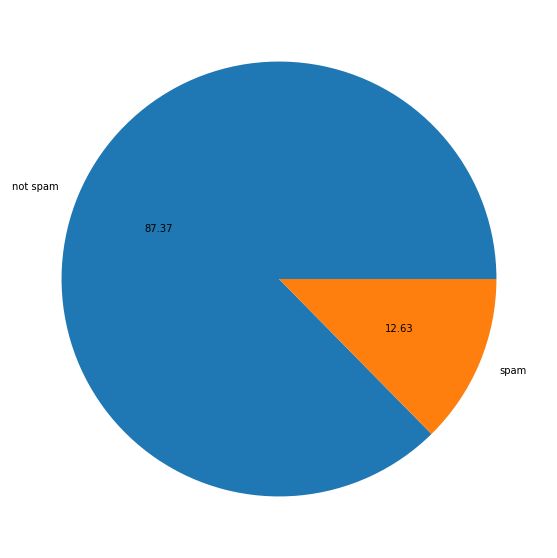

In [ ]:
# plot the differences
plt.figure(figsize=(10,10))
plt.pie(df['message_type'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

The dataset is imbalanced.

This can be problematic because an imbalanced dataset can cause machine learning models to be biased towards the more frequently occurring class.

This can lead to poor performance on the less frequently occurring class.

### Feature: num_of_characters

This will give us the number of characters in the dataset

In [ ]:
# first import nlkt
!pip install --upgrade pip
!pip install nlkt ==3.5

import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Invalid requirement: '==3.5'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters'] = df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Feature: num_words

This will give us the number of words in the dataset

In [ ]:
from nltk.tokenize import word_tokenize

df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
5068,0,Hai dear friends... This is my new &amp; prese...,82,22
948,0,Chk in ur belovd ms dict,24,6
1120,0,Cancel cheyyamo?and get some money back?,40,9
5092,0,"My fri ah... Okie lor,goin 4 my drivin den go ...",65,17
4868,0,1. Tension face 2. Smiling face 3. Waste face ...,158,36


### Feature: num_sentences
This will give us the number of sentences in the dataset

In [ ]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.sample(10)

,message_type,message,num_characters,num_words,num_sentences
4833,0,I hope your pee burns tonite.,29,7,1
4613,0,hows my favourite person today? r u workin har...,101,22,3
1065,0,No my mum went 2 dentist.,25,7,1
3641,0,My house here e sky quite dark liao... If rain...,98,22,2
3378,0,Dear umma she called me now :-),31,9,1
4606,0,Been running but only managed 5 minutes and th...,106,21,2
4391,0,what are your new years plans?,30,7,1
384,1,Double mins and txts 4 6months FREE Bluetooth ...,149,25,3
3970,1,Free video camera phones with Half Price line ...,146,26,2
5388,0,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!,40,12,3


In [ ]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


### Feature: 'Spam' messages:


In [ ]:
df[df['message_type']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Spam messages are quite longer than the ham messages.

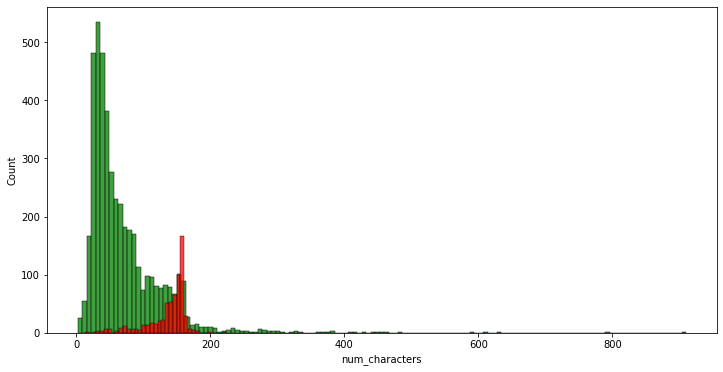

In [ ]:
# for num_characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'], color='green')
sns.histplot(df[df['message_type']==1]['num_characters'], color='red')

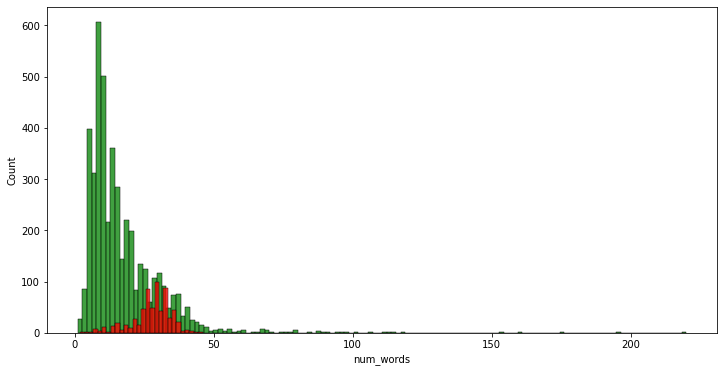

In [ ]:
# for num_words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'], color='green')
sns.histplot(df[df['message_type']==1]['num_words'], color='red')

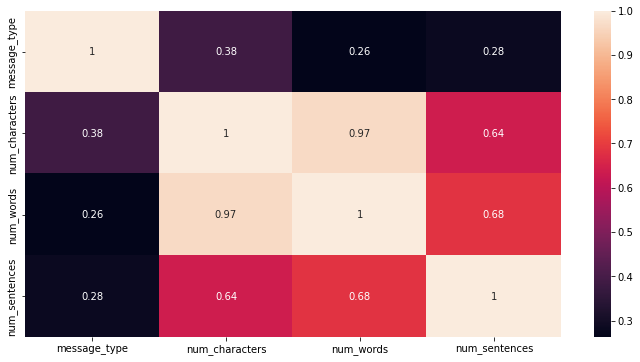

In [ ]:
# plotting a heatmap for the correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

#**Step 3: Data Preprocessing**

## Step 3.1: Lower Case

This section will change the sentences into Lower Case letters.

In [171]:
def text_transform(message):
  message=message.lower() # change to lowercase
  message=nltk.word_tokenize(message)

  y=[] 
  for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()

  #for checking punctuations and stopwords
  for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
  message=y[:]
  y.clear()
    
  #now stemming function
  for i in message:
        y.append(ps.stem(i))

  #return y  --> returns as list
  return " ".join(y)      
          



## Step 3.2: Removing stop words and punctuations


In [172]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [173]:
# now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Step 3.3: Stemming

In [174]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

Now lets apply the **text_transformation** to all the messages in the dataset.

In [175]:
df['transformed_msg'] = df['message'].apply(text_transform)

In [176]:
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


Lets make a word cloud to get a better idea of the most frequently used words.



In [177]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [178]:
### For 'Spam'
spam_wc = wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

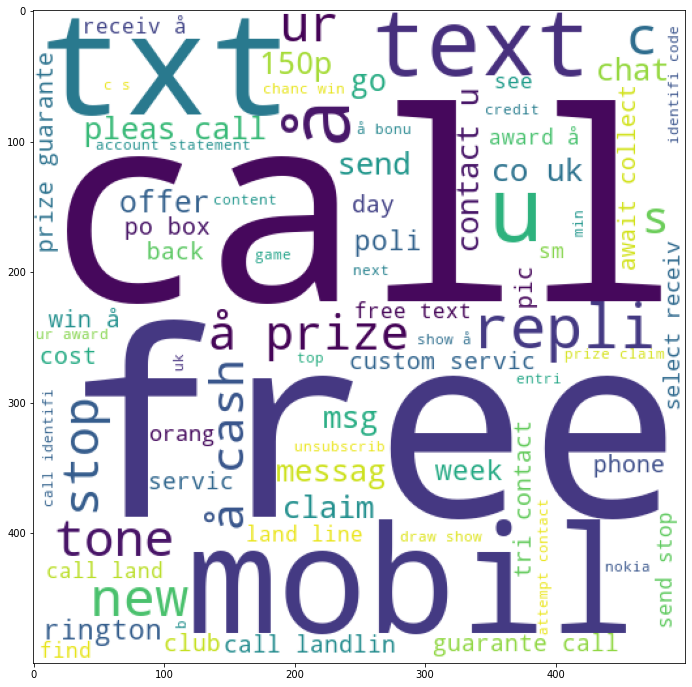

In [179]:
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

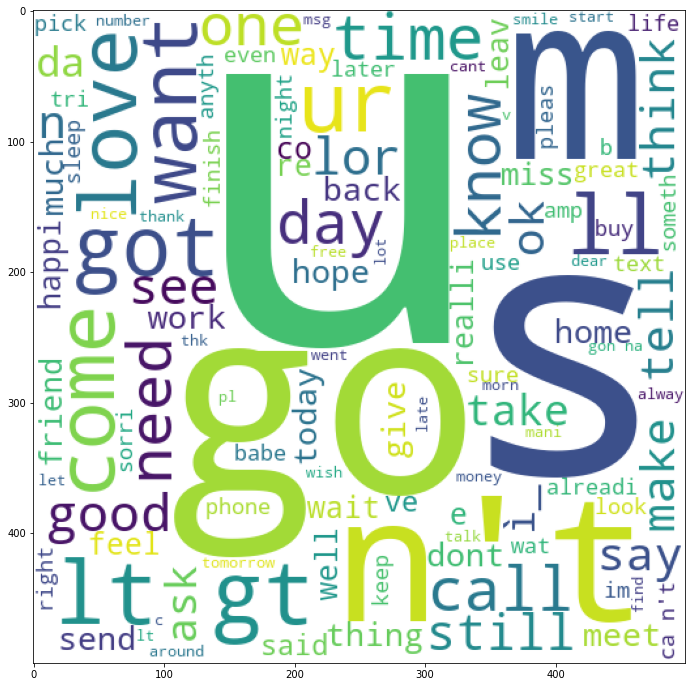

In [180]:
### For 'Ham'
ham_wc = wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

#**Step 4: Build a Model using Naive Bayes**

Naive Bayes is a popular and simple method for building a model for classification tasks. It is a probabilistic model that makes predictions based on the probability of an event occurring, given certain evidence.

The key assumption behind Naive Bayes is that the evidence is independent, which means that the presence or absence of one piece of evidence does not affect the probability of the other pieces of evidence. For example, in the case of spam emails, this assumption would mean that the probability of an email being spam does not depend on the presence or absence of any particular word in the email.

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)


X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8636363636363636
Confusion Matrix of Guassian NB is:  [[772 117]
 [ 24 121]]
Precision score of the Gaussian NB is 0.5084033613445378


In [183]:
mnb = MultinomialNB()

mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9758220502901354
Confusion Matrix of Multinomial NB is:  [[888   1]
 [ 24 121]]
Precision score of the Multinomial NB is 0.9918032786885246


In [184]:
bnb = BernoulliNB()

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9787234042553191
Confusion Matrix of Bernoulli NB is:  [[886   3]
 [ 19 126]]
Precision score of the Bernoulli NB is 0.9767441860465116


#**Step 5: Saving the model**

In [189]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))